In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
from scipy.stats import multivariate_normal
from scipy.stats import norm
from numpy import random as rd
from scipy import stats

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [9]:
def p(z):
    return 1.0 / (np.pi * (1 + z ** 2))

def pt(z):
    return 1.0 / (1 + z ** 2)
    
def q_draw(z, v):
    return rd.normal(z, np.sqrt(v))

def q_pdf(z, zc, v):
    return norm.pdf(z, zc, np.sqrt(v))

def A(z, zt, v):
    num = p(z) * q_pdf(zt, z, v)
    den = p(zt) * q_pdf(z, zt, v)
    return min(1, num / den)

def At(z, zt, v):
    num = pt(z) * q_pdf(zt, z, v)
    den = pt(zt) * q_pdf(z, zt, v)
    return min(1, num / den)

def mcmc(v, it, mA = A):
    zt = 0
    data = np.zeros(it)
    ans = 0
    for i in range(it):
        zs = q_draw(zt, v)
        u = rd.uniform()
        if (u <= mA(zs, zt, v)):
            ans += 1
            zt = zs
        data[i] = zt
    return data, ans


0.5423
[ 0.08434123  0.08434123 -1.69526045 -0.36168706  0.02111221  3.90387106
  5.08597741  3.95953394  3.95953394  4.41551051]


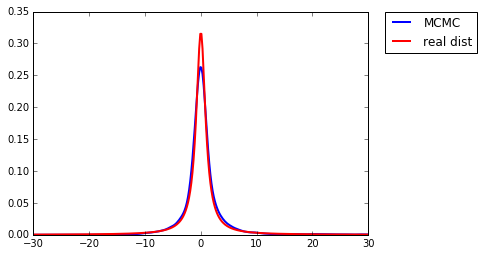

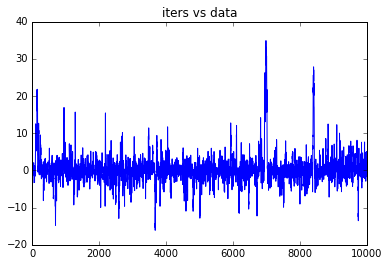

In [19]:
def sim(v, it, mA = A):
    data, ans = mcmc(v, it, mA)
    print (ans / it)
    print (data[-10:])

    kernel = stats.gaussian_kde(data)
    x = np.linspace(-30, 30, 300)
    plt.plot(x, kernel(x), label='MCMC', lw=2)
    plt.plot(x, p(x),'r', lw=2, label='real dist')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    x = np.arange(0, it, 1)
    plt.plot(x, data)
    plt.title('iters vs data')
    plt.show()
    
sim(8, 10000)

0.7784
[ 1.01145975  0.82780587  0.82780587 -0.35826485 -1.22942279 -1.22942279
 -2.52553537 -1.17671283 -1.17671283 -0.9599148 ]


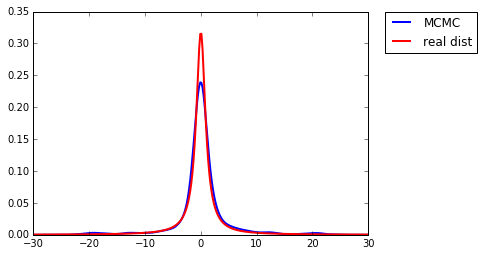

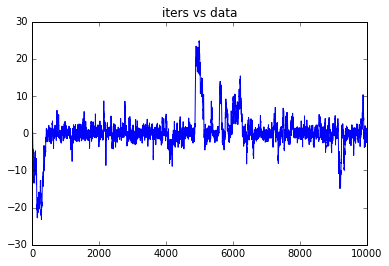

0.1558
[ 1.78361558  1.78361558  1.78361558  1.78361558  1.78361558  1.78361558
  1.78361558  1.78361558  1.78361558  1.78361558]


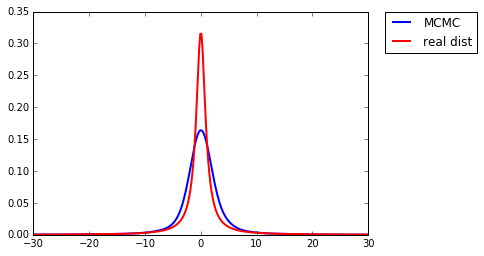

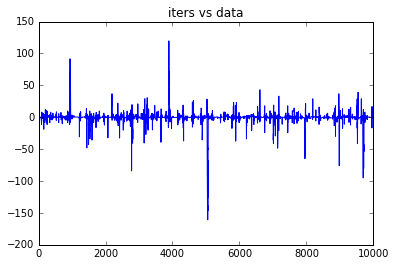

0.6704
[ 0.91371857  0.91371857  0.91371857 -1.75064513  1.52209534  2.10776442
  0.0088818  -0.69831821 -0.69831821 -0.69831821]


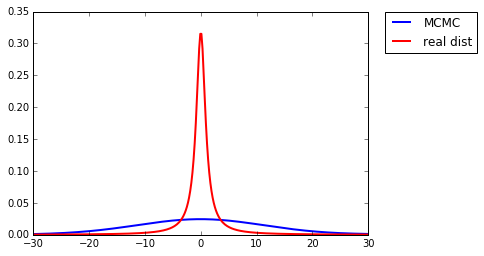

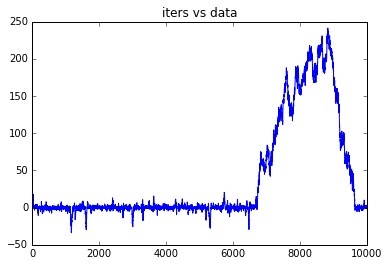

In [20]:
sim(1, 10000)
sim(500, 10000)
sim(8, 10000)

0.8616
[-0.65936308  0.24797065  0.24797065  0.76526644  0.52942819  0.5242069
  0.41181228  0.41181228 -0.45225555 -0.49965943]


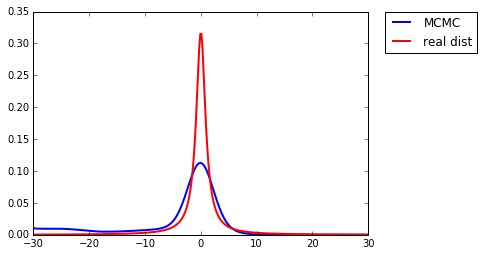

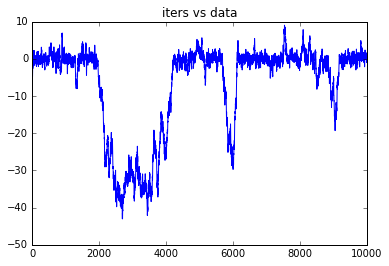

0.8361
[ 0.67974987  0.67974987  1.41791089  1.41791089  1.48130435  1.48130435
  1.193       1.62751471  0.94811479  1.90016562]


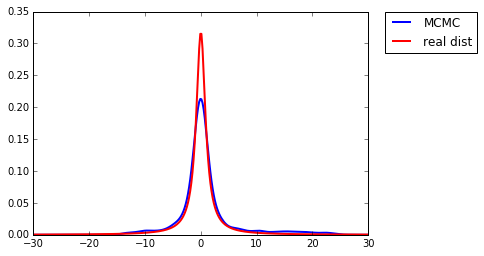

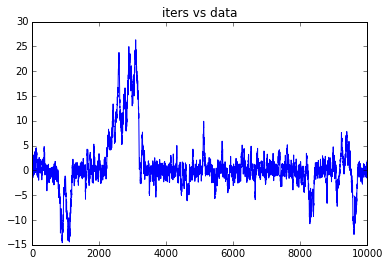

In [21]:
sim(0.5, 10000)
sim(0.5, 10000, mA=At)